<a href="https://colab.research.google.com/github/feniltailor22/Time-Series-Analysis/blob/main/Forecasting_Future_Sales_Using_ARIMA%2C_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
#Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [10]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


**Visualize the Data**

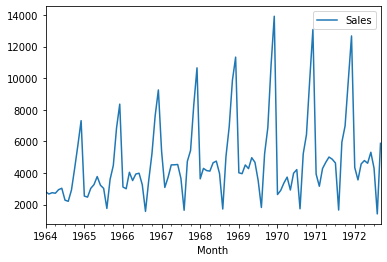

In [14]:
df.plot()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Intuation on Autocorrelation(ACF) and Partial Autocorrelation(PACF)**

Identification of an AR (Auto Regressive) model is often best done with the PACF. For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA (Moving Average) model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.



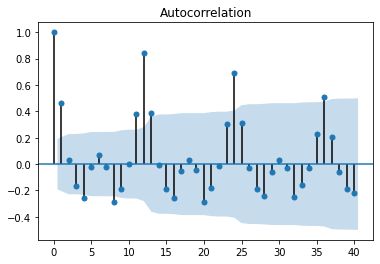

In [16]:
df_acf_plot= plot_acf(df, lags=40)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


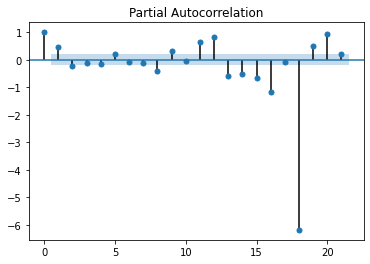

In [17]:
df_pacf_plot= plot_pacf(df)

In [18]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller, kpss

In [19]:
df_adf_test=adfuller(df['Sales'])

In [20]:
print(f'ADF Statistic: {df_adf_test[0]}')

ADF Statistic: -1.8335930563276228


In [21]:
print(f'p-value: {df_adf_test[1]}')

p-value: 0.363915771660245


For ADF Test:

The p-value is not less than the significance level (say 0.05) in order to reject the null hypothesis. 

Here p-value is >0.05 inferring that we failed to reject the Null Hypothesis.

Thereby, inferring that the series is stationary means it has some time dependency.


In [22]:
df_kpss_test=kpss(df['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [23]:
print(f'KPSS Statistic: {df_kpss_test[0]}')

KPSS Statistic: 0.6091402884961419


In [24]:
print(f'KPSS Statistic: {df_kpss_test[1]}')

KPSS Statistic: 0.021805428318532553


For KPSS Test:

The p-value should less than the significance level (say 0.05) in order to reject the null hypothysis. 

Here, p-value is < 0.05 inferring that we rejected the Null Hypothesis.

Thereby, inferring that the series is stationary means it has some time dependency.


**Differencing:**

Making the data stationary by Shifting a value by One Step and substracting the output data with original df['Sales'] to get stationary data

In [25]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [26]:
df_diff= df.diff(periods=1).dropna()

In [27]:
df_diff

,Sales
Month,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0
...,...
1972-05-01,-170.0
1972-06-01,694.0
1972-07-01,-1014.0


**Seasonality Test**

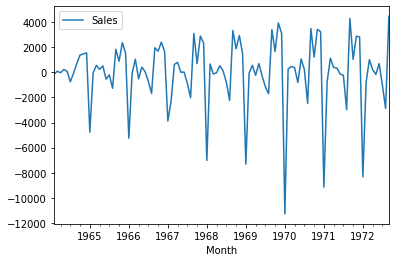

In [28]:
df_diff.plot()

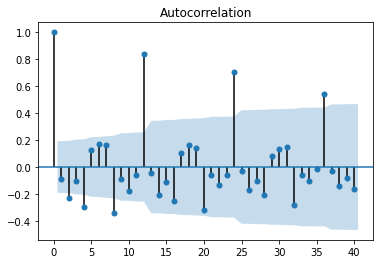

In [29]:
df_diff_acf_plot= plot_acf(df_diff, lags=40)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


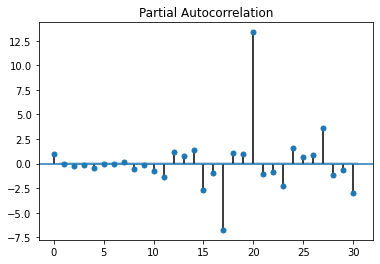

In [30]:
df_diff_pacf_plot= plot_pacf(df_diff, lags=30)

In [31]:
df_diff_adf_test= adfuller(df_diff['Sales'])

In [32]:
print(f'ADF Statistic: {df_diff_adf_test[0]}')

ADF Statistic: -7.189896448050998


In [33]:
print(f'p-value: {df_diff_adf_test[1]}')

p-value: 2.519620447387099e-10


In [34]:
df_diff_kpss_test= kpss(df_diff['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [35]:
print(f'KPSS Statistic: {df_diff_kpss_test[0]}')

KPSS Statistic: 0.06603977617549846


In [36]:
print(f'p-value: {df_diff_kpss_test[1]}')

p-value: 0.1


**ARIMA Model**

Three values are given as an input to ARIMA model:

* p: AR model lags 
* d: differencing
* q: MA lags

In [37]:
from statsmodels.tsa.arima_model import ARIMA

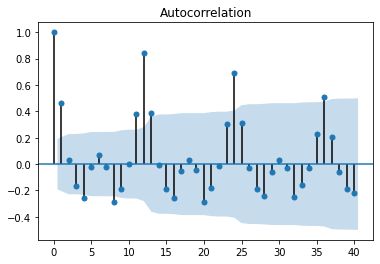

In [38]:
df_acf_plot

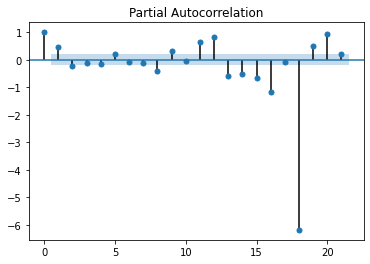

In [39]:
df_pacf_plot

In [40]:
model= ARIMA(endog=df['Sales'], order=(2,1,4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
model_fit= model.fit()

In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -937.200
Method:                       css-mle   S.D. of innovations           1895.396
Date:                Mon, 31 Jan 2022   AIC                           1890.399
Time:                        02:52:09   BIC                           1911.555
Sample:                    02-01-1964   HQIC                          1898.970
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7276     11.305      2.010      0.047       0.570      44.885
ar.L1.D.Sales    -0.7987      0.081     -9.888      0.000      -0.957      -0.640
ar.L2.D.Sales    -0.7465      0.076     -9.763      0.000      -0.896      -0.597
ma.L1.D.Sales     0.4583      0.073      6.235      0.000       0.314       0.602
ma.L2.D.Sales     0.0681      0.058      1.181      0.241      -0.045       0.181
ma.L3.D.Sales    -0.7247      0.057    -12.770      0.000      -0.836      -0.613
ma.L4.D.Sales    -0.8016      0.072    -11.204      0.000      -0.942      -0.661
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5350           -1.0264j            1.1574           -0.3265
AR.2           -0.5350           +1.0264j            1.1574            0.3265
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.3283           -0.9446j            1.0000           -0.3032
MA.3           -0.3283           +0.9446j            1.0000            0.3032
MA.4           -1.2474           -0.0000j            1.2474           -0.5000
-----------------------------------------------------------------------------
"""

In [43]:
df['forecast']= model_fit.predict(start=90,end=105,dynamic=True)

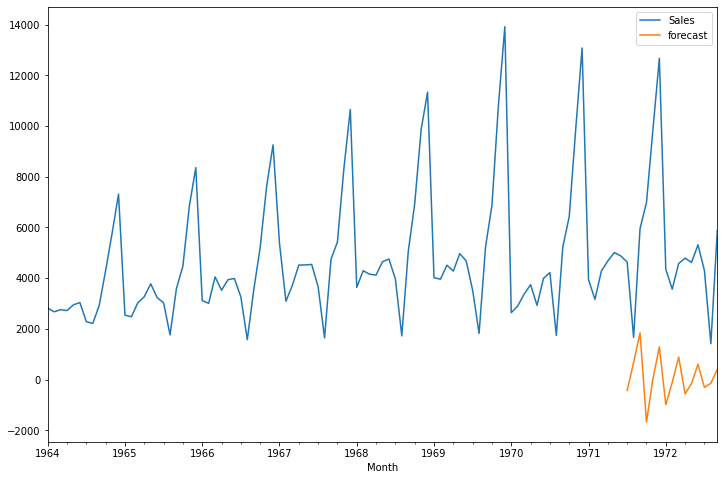

In [44]:
df[['Sales','forecast']].plot(figsize=(12,8))

**As you can see from the above graph that the forecasting for seasonal data is not accurate by ARIMA model. Thereby, we will use Seasonal ARIMA(SARIMA)**

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model= SARIMAX(endog=df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
#seasonal_order: The (P,D,Q,s) order

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
sarimax_model_fit=model.fit()

In [48]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 31 Jan 2022   AIC                           1486.804
Time:                                    02:52:12   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (Q):                       40.24   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
df['sarimax_forecast']=sarimax_model_fit.predict(start=90,end=103,dynamic=True)

In [50]:
df[['Sales','sarimax_forecast']][90:]

,Sales,sarimax_forecast
Month,,
1971-07-01,4633.0,4437.325255
1971-08-01,1659.0,2050.747765
1971-09-01,5951.0,5493.376687
1971-10-01,6981.0,6752.038759
1971-11-01,9851.0,10327.297109
1971-12-01,12670.0,13632.323858
1972-01-01,4348.0,3832.961650
1972-02-01,3564.0,3313.097134
1972-03-01,4577.0,4285.476327


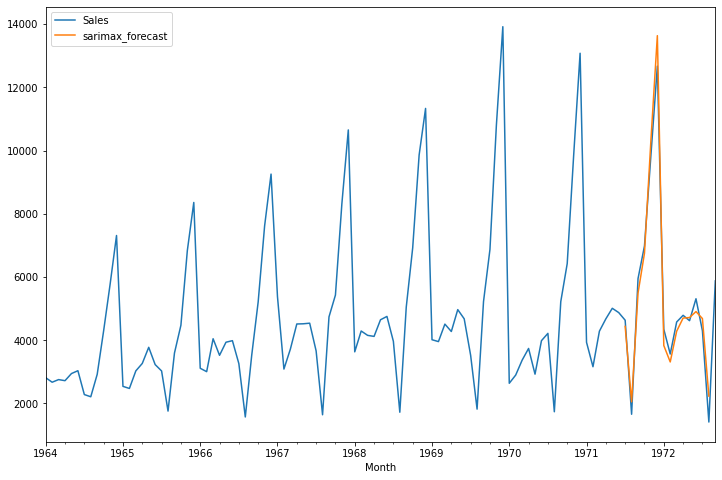

In [51]:
df[['Sales','sarimax_forecast']].plot(figsize=(12,8))

In [52]:
from sklearn import metrics

In [53]:
MAE_pred_sarima= metrics.mean_absolute_error(df['Sales'][90:104],df['sarimax_forecast'][90:104])
print('MAE:' + str (MAE_pred_sarima))

MAE:397.78234907752227


In [54]:
MAPE_pred_sarima= metrics.mean_absolute_percentage_error(df['Sales'][90:104],df['sarimax_forecast'][90:104])
print('MAPE:' + str (MAPE_pred_sarima))

MAPE:0.11078719073415202


In [55]:
MSE_pred_sarima= metrics.mean_squared_error(df['Sales'][90:104],df['sarimax_forecast'][90:104])
print('MSE:' + str (MSE_pred_sarima))

MSE:215944.8252870872


In [56]:
print('RMSE:', np.sqrt(MSE_pred_sarima))

RMSE: 464.6986392137244


In [57]:
print(sarimax_model_fit.aic)

1486.8041358155185


**Future Sales Prediction**

In [58]:
from pandas.tseries.offsets import DateOffset

In [59]:
df['Sales'].tail()

Month
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: Sales, dtype: float64

In [60]:
make_dates= [df.index[-1]+ DateOffset(months=x) for x in range(1,24)]

In [61]:
make_dates

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [62]:
future_dateset_df=pd.DataFrame(index=make_dates,columns=df.columns)

In [63]:
future_dateset_df.head()

,Sales,forecast,sarimax_forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN


In [64]:
future_dateset_df.tail()

,Sales,forecast,sarimax_forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [65]:
df.head()

,Sales,forecast,sarimax_forecast
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN


In [66]:
future_df=pd.concat([df,future_dateset_df])

In [67]:
future_df.head()

,Sales,forecast,sarimax_forecast
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN


In [68]:
future_df.tail()

,Sales,forecast,sarimax_forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [69]:
future_df['forecast'] = sarimax_model_fit.predict(start = 104, end = 127, dynamic= True)

In [70]:
future_df.head()

,Sales,forecast,sarimax_forecast
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN


In [71]:
future_df.tail()

,Sales,forecast,sarimax_forecast
1974-04-01,NaN,5189.452983,NaN
1974-05-01,NaN,5119.495221,NaN
1974-06-01,NaN,5675.242517,NaN
1974-07-01,NaN,4726.202412,NaN
1974-08-01,NaN,1823.475360,NaN


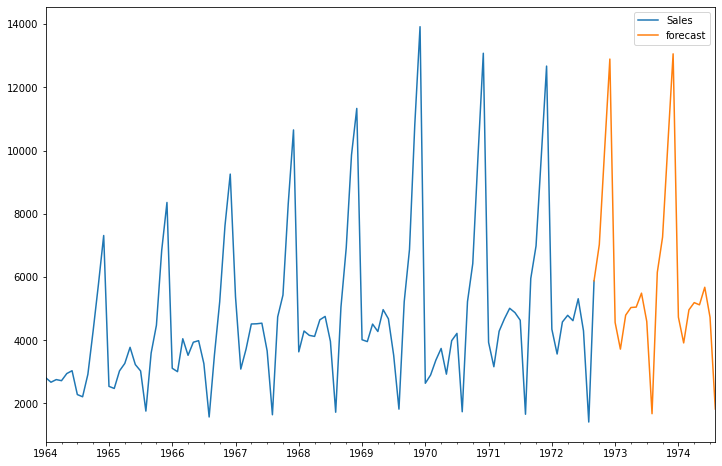

In [72]:
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 